In [1]:
#Load Data
import pandas as pd

businesses = pd.read_json('yelp_business.json',lines=True)
reviews = pd.read_json('yelp_review.json',lines=True)
users = pd.read_json('yelp_user.json',lines=True)
checkins = pd.read_json('yelp_checkin.json',lines=True)
tips = pd.read_json('yelp_tip.json',lines=True)
photos = pd.read_json('yelp_photo.json',lines=True)

In [2]:
#Show Data
pd.options.display.max_columns = 60
pd.options.display.max_colwidth = 500


In [3]:
#Investigae Dataset

#businesses.head()
#reviews.head()
#users.head()
#checkins.head()
#tips.head()
#photos.head()

In [4]:
#Total businesses
print(len(businesses))
#Features in reviews
print(reviews.columns)

188593
Index(['business_id', 'average_review_age', 'average_review_length',
       'average_review_sentiment', 'number_funny_votes', 'number_cool_votes',
       'number_useful_votes'],
      dtype='object')


In [5]:
#Features users
users.describe()

,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite
count,188593.000000,188593.000000,188593.000000,188593.000000,188593.000000
mean,105.132000,2005.367009,11.590148,122.110660,0.923313
std,162.653680,554.174540,25.901801,208.814471,1.109289
min,1.000000,76.000000,0.000000,0.666667,0.000000
25%,26.666667,1647.000000,0.666667,21.000000,0.000000
50%,59.384615,1957.150000,3.583333,62.142857,0.583333
75%,117.666667,2312.238095,11.555556,143.454545,1.400000
max,4219.000000,4860.000000,1174.666667,6335.000000,10.666667


In [6]:
#Yelp rating (stars) of chosen establishment
businesses[businesses['business_id'] == '5EvUIR4IzCWUOm0PsUZXjA']['stars']


30781    3.0
Name: stars, dtype: float64

In [7]:
#Merge Data
df = pd.merge(businesses, reviews, how='left', on='business_id')
df = pd.merge(df, users, how='left', on='business_id')
df = pd.merge(df, checkins, how='left', on='business_id')
df = pd.merge(df, tips, how='left', on='business_id')
df = pd.merge(df, photos, how='left', on='business_id')
print(len(df))

188593


In [8]:
print(df.columns)

Index(['address', 'alcohol?', 'attributes', 'business_id', 'categories',
       'city', 'good_for_kids', 'has_bike_parking', 'has_wifi', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'neighborhood',
       'postal_code', 'price_range', 'review_count', 'stars', 'state',
       'take_reservations', 'takes_credit_cards', 'average_review_age',
       'average_review_length', 'average_review_sentiment',
       'number_funny_votes', 'number_cool_votes', 'number_useful_votes',
       'average_number_friends', 'average_days_on_yelp', 'average_number_fans',
       'average_review_count', 'average_number_years_elite', 'time',
       'weekday_checkins', 'weekend_checkins', 'average_tip_length',
       'number_tips', 'average_caption_length', 'number_pics'],
      dtype='object')


In [9]:
#Clean Data
features_to_remove = ['address','attributes','business_id','categories','city','hours','is_open','latitude','longitude','name','neighborhood','postal_code','state','time']
df.drop(labels=features_to_remove, axis=1, inplace=True)

In [10]:
df.isna().any()

alcohol?                      False
good_for_kids                 False
has_bike_parking              False
has_wifi                      False
price_range                   False
review_count                  False
stars                         False
take_reservations             False
takes_credit_cards            False
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_funny_votes            False
number_cool_votes             False
number_useful_votes           False
average_number_friends        False
average_days_on_yelp          False
average_number_fans           False
average_review_count          False
average_number_years_elite    False
weekday_checkins               True
weekend_checkins               True
average_tip_length             True
number_tips                    True
average_caption_length         True
number_pics                    True
dtype: bool

In [11]:
df.fillna({'weekday_checkins':0,
           'weekend_checkins':0,
           'average_tip_length':0,
           'number_tips':0,
           'average_caption_length':0,
           'number_pics':0},
          inplace=True)
df.isna().any()

alcohol?                      False
good_for_kids                 False
has_bike_parking              False
has_wifi                      False
price_range                   False
review_count                  False
stars                         False
take_reservations             False
takes_credit_cards            False
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_funny_votes            False
number_cool_votes             False
number_useful_votes           False
average_number_friends        False
average_days_on_yelp          False
average_number_fans           False
average_review_count          False
average_number_years_elite    False
weekday_checkins              False
weekend_checkins              False
average_tip_length            False
number_tips                   False
average_caption_length        False
number_pics                   False
dtype: bool

In [12]:
#Explore correlation
df.corr()

,alcohol?,good_for_kids,has_bike_parking,has_wifi,price_range,review_count,stars,take_reservations,takes_credit_cards,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite,weekday_checkins,weekend_checkins,average_tip_length,number_tips,average_caption_length,number_pics
alcohol?,1.000000,0.305284,0.213318,0.345032,0.349004,0.259836,-0.043332,0.601670,0.190738,0.139108,0.037369,0.097188,0.117472,0.188598,0.165775,0.015261,0.129901,0.017794,0.026846,0.099141,0.094398,0.131175,0.098037,0.208856,0.305570,0.252523
good_for_kids,0.305284,1.000000,0.271788,0.258887,0.205513,0.162469,-0.030382,0.318729,0.150360,0.055847,-0.079183,0.073806,0.060658,0.113262,0.083832,0.016557,0.045057,0.024901,0.040692,0.094233,0.068960,0.079808,0.121948,0.156536,0.291413,0.175058
has_bike_parking,0.213318,0.271788,1.000000,0.235138,0.416044,0.155505,0.068084,0.160129,0.286298,-0.080443,-0.116295,0.130448,0.060595,0.114094,0.094000,0.028307,-0.045849,0.018120,0.031203,0.083062,0.082474,0.093579,0.144163,0.147115,0.180468,0.109552
has_wifi,0.345032,0.258887,0.235138,1.000000,0.240796,0.195737,-0.039857,0.312217,0.155098,-0.034258,-0.037712,0.054699,0.082213,0.147320,0.120622,0.015937,0.000448,0.023913,0.044006,0.082863,0.107467,0.126861,0.104742,0.173542,0.258938,0.210583
price_range,0.349004,0.205513,0.416044,0.240796,1.000000,0.148277,-0.052565,0.316105,0.400742,0.189623,0.003850,0.089349,0.073215,0.119422,0.098990,0.087231,0.176133,0.104221,0.122982,0.210487,0.057877,0.081321,0.129212,0.119632,0.170171,0.143570
review_count,0.259836,0.162469,0.155505,0.195737,0.148277,1.000000,0.032413,0.187755,0.119984,0.010070,0.004748,0.076265,0.548164,0.860767,0.746949,0.026206,0.050451,0.000474,-0.002576,0.014712,0.567452,0.699631,0.094133,0.844978,0.224983,0.610889
stars,-0.043332,-0.030382,0.068084,-0.039857,-0.052565,0.032413,1.000000,-0.024486,0.037748,-0.125645,-0.277081,0.782187,0.001320,0.043375,-0.000066,-0.007629,-0.038061,-0.031141,-0.066572,-0.064419,0.004130,0.007863,-0.052899,0.014038,0.000040,0.001727
take_reservations,0.601670,0.318729,0.160129,0.312217,0.316105,0.187755,-0.024486,1.000000,0.127941,0.064098,0.046331,0.086728,0.071131,0.129165,0.115583,-0.025522,0.048850,0.001131,0.010618,0.063990,0.053162,0.076183,0.084098,0.134832,0.282823,0.231242
takes_credit_cards,0.190738,0.150360,0.286298,0.155098,0.400742,0.119984,0.037748,0.127941,1.000000,0.056399,-0.081383,0.084171,0.049945,0.079879,0.077804,0.027924,0.078443,-0.007124,-0.005260,0.009551,0.047402,0.055898,0.119925,0.097700,0.103271,0.073276
average_review_age,0.139108,0.055847,-0.080443,-0.034258,0.189623,0.010070,-0.125645,0.064098,0.056399,1.000000,0.192355,0.003662,0.032199,0.031577,0.028122,0.218990,0.820888,0.243377,0.261623,0.377335,0.030324,0.035531,-0.000525,0.050846,-0.024121,-0.041140


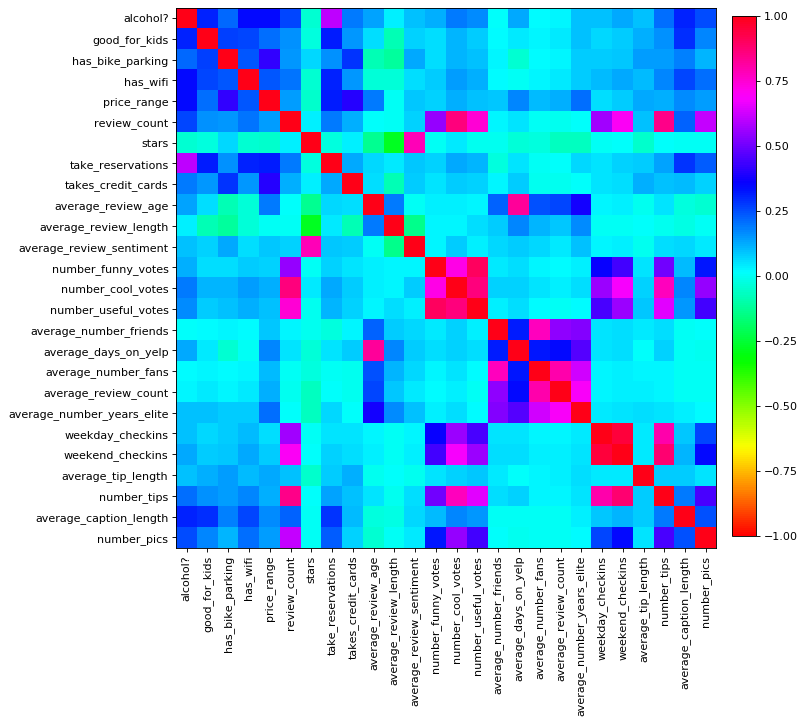

In [13]:
#Plot correlation matrix
from matplotlib import pyplot as plt
A = df.corr()

fig = plt.figure(figsize=(10, 10), dpi=80)
ax = fig.add_subplot()
plt.subplots_adjust(right=0.8)
cax = fig.add_axes([0.82, 0.18, 0.03, 0.65])

im = ax.imshow(A, cmap='hsv', vmin=-1, vmax=1)
ax.set_xticks(range(len(A.columns)))
ax.set_xticklabels(A.columns)
ax.set_yticks(range(len(A.columns)))
ax.set_yticklabels(A.columns)
ax.tick_params(axis='x', rotation=90)
#ax0.set_clim(vmin = -1, vmax = 1) 
fig.colorbar(im, cax=cax, orientation='vertical')


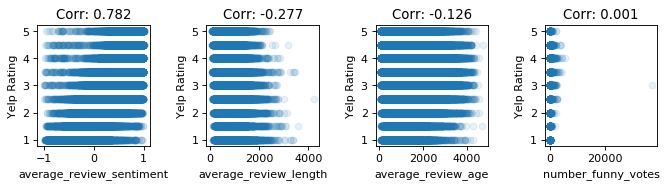

In [14]:
#Plot Features
fig = plt.figure(figsize=(10, ^), dpi=80)
plt.subplots_adjust(wspace=0.5)
ax0 = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)

ax0.scatter(df['average_review_sentiment'],df['stars'],alpha=0.1)
ax0.set_xlabel('average_review_sentiment')
ax0.set_ylabel('Yelp Rating')
ax0.set_title('Corr: '+str(round(A.loc['average_review_sentiment', 'stars'],3)))

ax1.scatter(df['average_review_length'],df['stars'],alpha=0.1)
ax1.set_xlabel('average_review_length')
ax1.set_ylabel('Yelp Rating')
ax1.set_title('Corr: '+str(round(A.loc['average_review_length', 'stars'],3)))

ax2.scatter(df['average_review_age'],df['stars'],alpha=0.1)
ax2.set_xlabel('average_review_age')
ax2.set_ylabel('Yelp Rating')
ax2.set_title('Corr: '+str(round(A.loc['average_review_age', 'stars'],3)))

ax3.scatter(df['number_funny_votes'],df['stars'],alpha=0.1)
ax3.set_xlabel('number_funny_votes')
ax3.set_ylabel('Yelp Rating')
ax3.set_title('Corr: '+str(round(A.loc['number_funny_votes', 'stars'],3)))

plt.show()

In [15]:
#Data Selection
features = df[['average_review_sentiment', 'average_review_length','average_review_age']]
ratings = df['stars']

In [16]:
#Trainign and Testing Set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)

In [17]:
#Create and train the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [18]:
model.score(X_train,y_train)


0.6520510292564032

In [19]:
model.score(X_test,y_test)

0.6495675480094902

In [20]:
#Result coeff.
sorted(list(zip(['average_review_sentiment', 'average_review_length','average_review_age'],model.coef_)),
       key = lambda x: abs(x[1]),reverse=True)

[('average_review_sentiment', 2.243030310441717),
 ('average_review_length', -0.0005978300178804306),
 ('average_review_age', -0.00015209936823152426)]

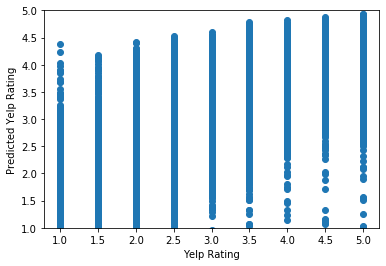

In [21]:
#Predict
y_predicted = model.predict(X_test)

plt.scatter(y_test,y_predicted)
plt.xlabel('Yelp Rating')
plt.ylabel('Predicted Yelp Rating')
plt.ylim(1,5)
plt.show()

Text(0.5, 1.0, 'Corr: 0.001')

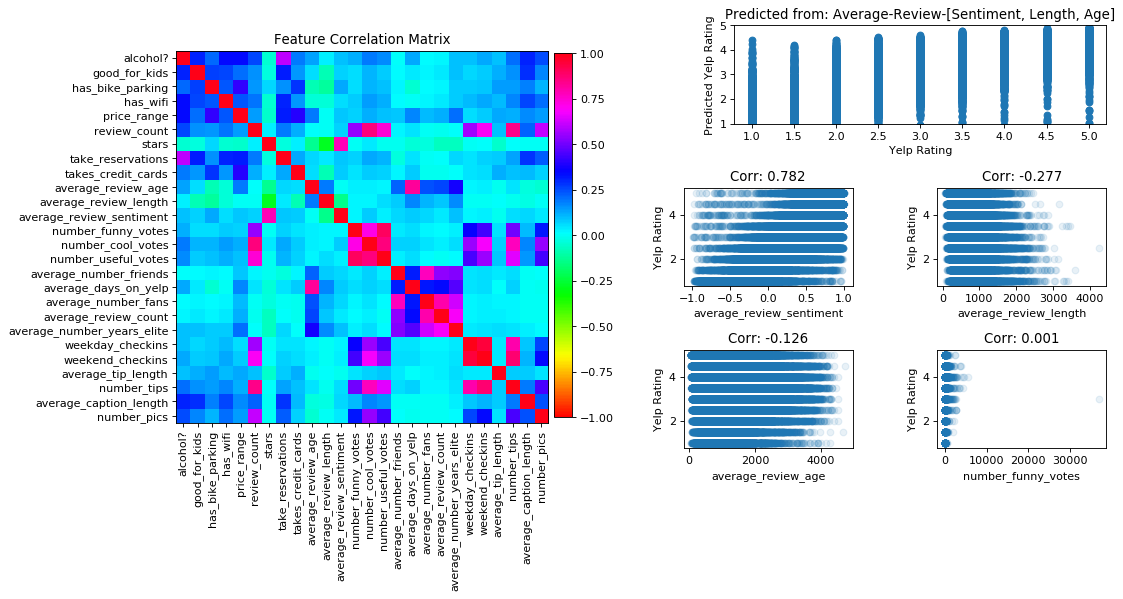

In [22]:
#Overview Plot
fig = plt.figure(figsize=(15, 7), dpi=80)
plt.subplots_adjust(wspace=0.5, hspace=0.65)
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(322)
ax2 = fig.add_subplot(347)
ax3 = fig.add_subplot(3,4,8)
ax4 = fig.add_subplot(3,4,11)
ax5 = fig.add_subplot(3,4,12)

#0
cax = fig.add_axes([0.44, 0.18, 0.015, 0.65])
im = ax0.imshow(A, cmap='hsv', vmin=-1, vmax=1)
ax0.set_xticks(range(len(A.columns)))
ax0.set_xticklabels(A.columns)
ax0.set_yticks(range(len(A.columns)))
ax0.set_yticklabels(A.columns)
ax0.set_title("Feature Correlation Matrix")
ax0.tick_params(axis='x', rotation=90)
fig.colorbar(im, cax=cax, orientation='vertical')

#1
ax1.scatter(y_test,y_predicted)
ax1.set_xlabel('Yelp Rating')
ax1.set_ylabel('Predicted Yelp Rating')
ax1.set_ylim(1,5)
ax1.set_title("Predicted from: Average-Review-[Sentiment, Length, Age]")

#2
ax2.scatter(df['average_review_sentiment'],df['stars'],alpha=0.1)
ax2.set_xlabel('average_review_sentiment')
ax2.set_ylabel('Yelp Rating')
ax2.set_title('Corr: '+str(round(A.loc['average_review_sentiment', 'stars'],3)))

#3
ax3.scatter(df['average_review_length'],df['stars'],alpha=0.1)
ax3.set_xlabel('average_review_length')
ax3.set_ylabel('Yelp Rating')
ax3.set_title('Corr: '+str(round(A.loc['average_review_length', 'stars'],3)))

#4
ax4.scatter(df['average_review_age'],df['stars'],alpha=0.1)
ax4.set_xlabel('average_review_age')
ax4.set_ylabel('Yelp Rating')
ax4.set_title('Corr: '+str(round(A.loc['average_review_age', 'stars'],3)))

#5
ax5.scatter(df['number_funny_votes'],df['stars'],alpha=0.1)
ax5.set_xlabel('number_funny_votes')
ax5.set_ylabel('Yelp Rating')
ax5.set_title('Corr: '+str(round(A.loc['number_funny_votes', 'stars'],3)))
